### Plotting number of hours of daylight per day of the year for specific latitudes
- Maurice F. Huguenin, m.huguenin-virchaux@unsw.edu.au, 19. 07. 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for matlab-like plotting   
from datetime import datetime, date # for finding day of year
import matplotlib.patheffects as PathEffects # for white shading around text
day_of_year = datetime.now().timetuple().tm_yday # current date
print('Day of year: ', day_of_year, '/ 365')
save = '/home/561/mv7494/IPOAnt_figures/'

Day of year:  171 / 365


### Calculate orbital parameters
references:
- (I)  https://www.astrouw.edu.pl/~jskowron/pracownia/praca/sunspot_answerbook_expl/expl-5.html
- (II) Jenkins, A. (2013). The Sun’s position in the sky. European Journal of Physics, 34(3), 633–652. https://doi.org/10.1088/0143-0807/34/3/633

In [53]:
d = np.linspace(1,365,365) # array with days per year (start, stop, step)

M = (-3.18 + 0.98560 * d)                                       # approximation of mean anomaly relative to perfect orbit
# M = -0.0410 + 0.017202 * d                                    # this is the same equation from Jenkins (2013) but it didn't really work 
phi = -1.3411 + M + 0.0334 * np.sin(M) + 0.0003 * np.sin(2 * M) # ecliptic longitude of the Earth per day
eta = 23.43622                                                  # Earth's obliquity (axial tilt) on 19th July 2023 (°)

# function to calculate daylight hours/day for different latitudes
def daylight_per_lat(L):
    "L: latitude"
    L_rad   = L   * np.pi / 180      # need all input in radians
    eta_rad = eta * np.pi / 180      # Earth's obliquity in radians
    phi_rad = phi * np.pi / 180      # ecliptic longitude in radians
    
    # Equation 17 from Jenkins (2013)
    H = 24 * (1 - (1 / np.pi) * np.arccos(np.tan(L_rad) * ((np.sin(eta_rad)*np.sin(phi_rad)) / (np.sqrt(1-np.sin(eta_rad)**2*np.sin(phi_rad)**2)))))
    H = np.roll(H, (31+28+20)) # shift data from first Equinox (~20th March) to the 1st January
    return H

# function to convert todays' daylight hours in decibel to [hh:mm:ss]
def time_convert(l):
    "example: time_convert(Zurich[day_of_year])"

    l = l[day_of_year] # get daylight of location l during today's day of the year
    hours = int(l)
    minutes = (l*60) % 60
    seconds = (l*3600) % 60
    return("%d:%02d.%02d" % (hours, minutes, seconds))

Antarctic_Circle = daylight_per_lat( -90+eta) # evaluate function for different locations
Hobart           = daylight_per_lat(-42.8826)
Singapore        = daylight_per_lat(  1.3521)
Sydney           = daylight_per_lat(-33.8666)
Zurich          = daylight_per_lat(  47.3769)
Falmouth         = daylight_per_lat( 41.5532) 

In [54]:
time_convert(Zurich)

'15:44.27'

### Plotting routine

CPU times: user 875 ms, sys: 45.5 ms, total: 920 ms
Wall time: 922 ms


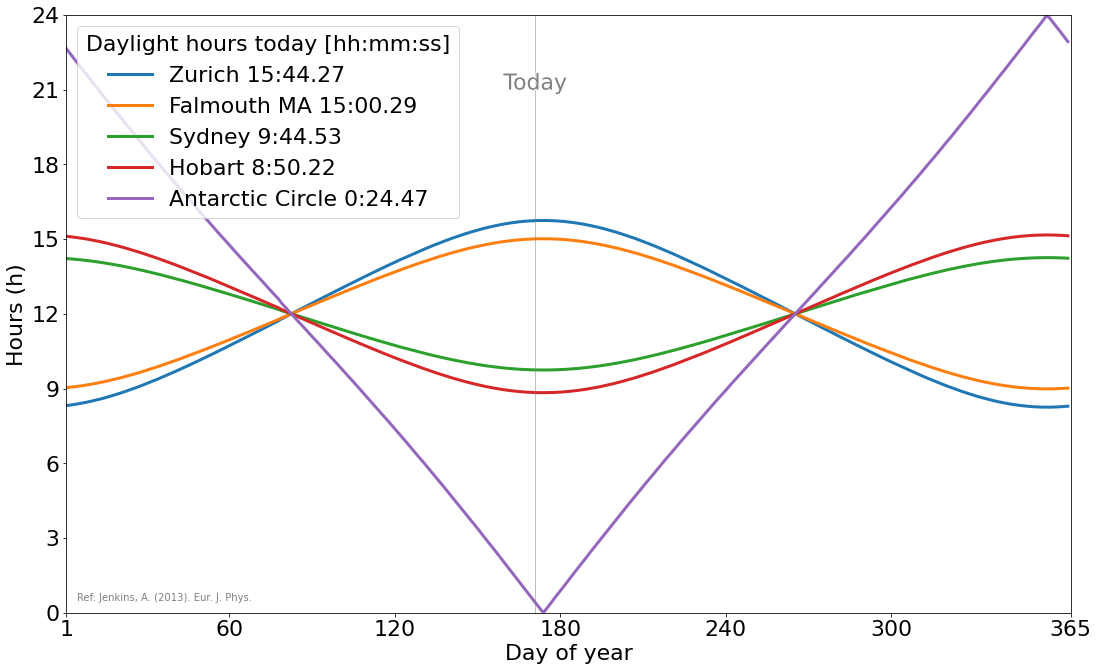

In [85]:
%%time
plt.figure(figsize=(18,11))
ax1 = plt.subplot(1,1,1)
fs=22; lw = 3 # fontsize
# --------------------------------------------------------------- #
# plotting the time series
plt.plot(Zurich          , linewidth=lw, label = 'Zurich '+ time_convert(Zurich))
plt.plot(Falmouth        , linewidth=lw, label = 'Falmouth MA '+ time_convert(Falmouth))
plt.plot(Sydney          , linewidth=lw, label = 'Sydney '+ time_convert(Sydney))
plt.plot(Hobart          , linewidth=lw, label = 'Hobart '+ time_convert(Hobart))
plt.plot(Antarctic_Circle, linewidth=lw, label = 'Antarctic Circle '+ time_convert(Antarctic_Circle))
# --------------------------------------------------------------- #

legend = plt.legend(fontsize=fs, title = 'Daylight hours today [hh:mm:ss]', loc='upper left')
plt.setp(legend.get_title(),fontsize=fs)

plt.xticks(fontsize=fs); plt.yticks(fontsize=fs) # fontsize of ticks
plt.xlabel('Day of year', fontsize=fs); plt.ylabel('Hours (h)', fontsize=fs) # ticklabels
plt.xlim([d[0], d[-1]]); plt.ylim([0, 24])
ax1.set_xticks([1, 60, 120, 180, 240, 300, 365]) # custom x ticks
ax1.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24]) # custom x ticks
plt.axvline(day_of_year, c = 'grey', linewidth = .5)
txt = plt.text(5, .5, 'Ref: Jenkins, A. (2013). Eur. J. Phys.', c = 'grey', ha= 'left', fontsize=10) # add annotation
txt = plt.text(day_of_year, 21, 'Today', c = 'grey', ha= 'center', fontsize=fs) # add annotation
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
#plt.title('Number of daylight hours', fontsize=fs)

# --- saving as 300 dpi .PNG image in specified folder --------------------- #
plt.savefig(save + 'Daylight_hours_as_function_of_day_in_year', 
            dpi=300, facecolor='w',                                          #
            edgecolor='w', orientation='landscape',                          #
            format=None, transparent=False, bbox_inches='tight',             #
            pad_inches=0.1, metadata=None)                                   #
# --- end of script -------------------------------------------------------- # 
# Wall time: 504 ms